In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt

In [2]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

# Matplotlib

For this excercise, we have written the following code to load the stock dataset built into plotly express.

In [23]:
stocks = px.data.stocks()
stocks.head()

# about stocks dataset: https://plotly.com/python-api-reference/generated/plotly.data.html

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


## Question 1: 

Select a stock and create a suitable plot for it. Make sure the plot is readable with relevant information, such as date, values.  

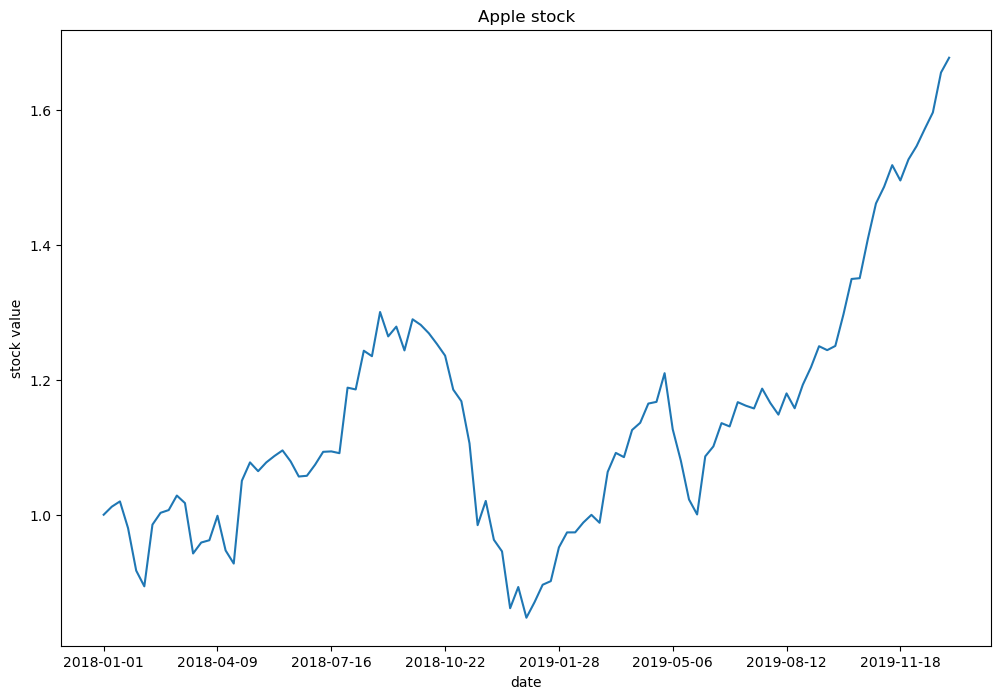

In [56]:
y = stocks['AAPL']
x = stocks['date']

# get figure and axes instances, set the figure size
fig, ax = plt.subplots(figsize=(12,8))

# plot
ax.plot(x, y)

# set x-axis spacing
ax.set_xticks(ax.get_xticks()[::14]) # 14 can be changed to other integers to change the intervals

# add labels
ax.set_xlabel('date')
ax.set_ylabel('stock value')

# title
ax.set_title('Apple stock')

# show the plot
plt.show()

## Question 2: 

You've already plot data from one stock. It is possible to plot multiples of them to support comparison.  
To highlight different lines, customise line styles, markers, colors and include a legend to the plot.

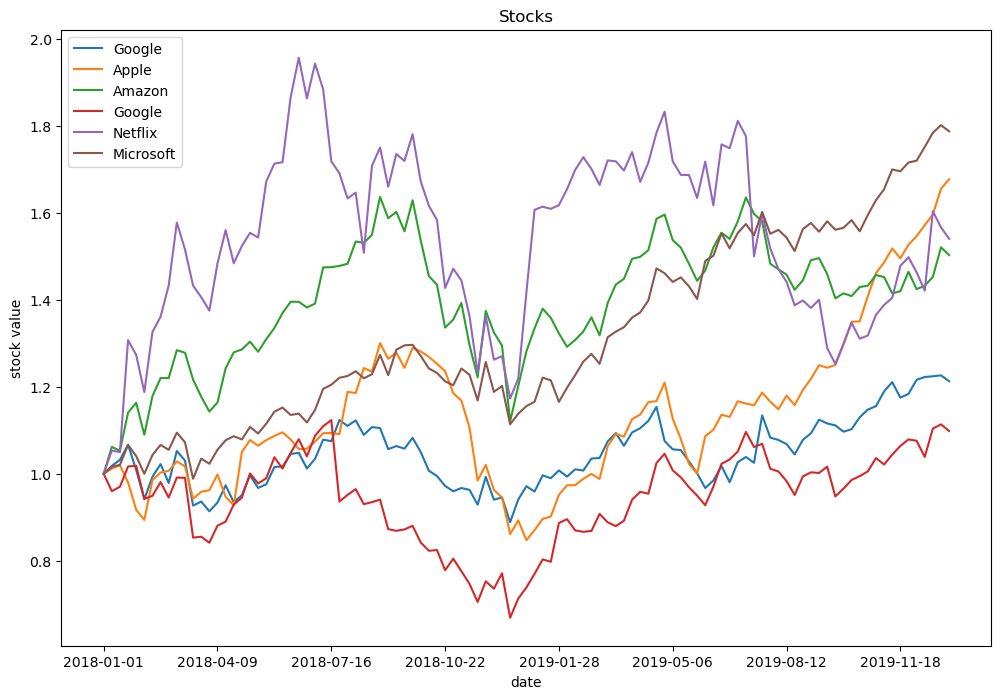

In [59]:
fig, ax = plt.subplots(figsize=(12,8))

# y axis values
y1 = stocks['GOOG']
y2 = stocks['AAPL']
y3 = stocks['AMZN']
y4 = stocks['FB']
y5 = stocks['NFLX']
y6 = stocks['MSFT']

# plot
ax.plot(x, y1, label = 'Google')
ax.plot(x, y2, label = 'Apple')
ax.plot(x, y3, label = 'Amazon')
ax.plot(x, y4, label = 'Google')
ax.plot(x, y5, label = 'Netflix')
ax.plot(x, y6, label = 'Microsoft')

# set x-axis spacing
ax.set_xticks(ax.get_xticks()[::14]) # 14 can be changed to other integers to change the intervals

# add labels
ax.set_xlabel('date')
ax.set_ylabel('stock value')

# add legend
ax.legend()

# title
ax.set_title('Stocks')

plt.show()

# Seaborn

First, load the [tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) dataset

In [61]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Question 3:

Let's explore this dataset. Pose a question and create a plot that support drawing answers for your question.

- What attribute correlate the most with tip?

<AxesSubplot:>

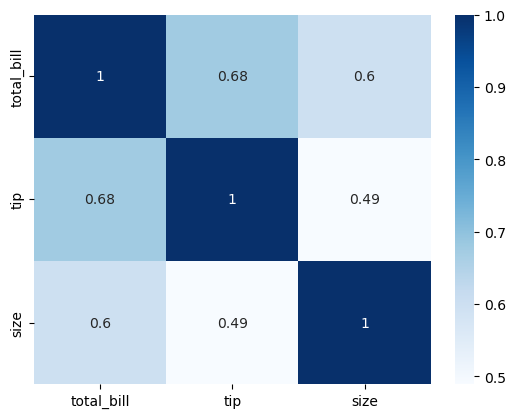

In [71]:
# get the correlation matrix
corr_matrix = tips.corr()

# plot it using seaborn
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues')

- **total_bill** and **tip** correlate the most.

# Plotly Express

## Question 4:

Redo the above exercises (challenges 2 & 3) with plotly express. Create diagrams which you can interact with.

### The stocks dataset

*Hints*:
- Turn stocks dataframe into a structure that can be picked up easily with plotly express

In [106]:
fig = px.line(stocks, x="date", y=['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], 
                markers=True, title='Stocks')
fig.show()

# can also do:
# import plotly.graph_objects as go 
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=stocks['date'], y=stocks['GOOG'],
#                     mode='lines+markers',
#                     name='Google'))
# fig.add_trace(go.Scatter(x=stocks['date'], y=stocks['AAPL'],
#                     mode='lines+markers',
#                     name='Apple'))
# ...

### The tips dataset

In [121]:
fig = px.scatter(tips, x="total_bill", y="tip", color="sex", facet_col="smoker", facet_row="time", color_discrete_sequence=['orange', 'darkslateblue'])
fig.show()

# CSS color values: https://www.w3.org/wiki/CSS/Properties/color/keywords

## Question 5:

Recreate the barplot below that shows the population of different continents for the year 2007. 

*Hints:*

- Extract the 2007 year data from the dataframe. You have to process the data accordingly
- use [plotly bar](https://plotly.com/python-api-reference/generated/plotly.express.bar)
- Add different colors for different continents
- Sort the order of the continent for the visualisation. Use [axis layout setting](https://plotly.com/python/reference/layout/xaxis/)
- Add text to each bar that represents the population 

In [122]:
#load data
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [208]:
# extract the 2007 year data
# df_2007 = df.query('year==2007')
# fig = px.bar(df_2007, x="pop", y="continent", orientation='h', color="continent", text="pop").update_xaxes(categoryorder="category descending")
# fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
# fig.show()
def get_pop_sum(df, cname):
    '''
    df: dataframe
    cname: str, indicating the name of the continent, i.e. `Asia`, 'Europe'
    return: a numerical number, indicating the population of this continent
    '''
    df_2007   = df.query('year==2007') # extract 2007 year data
    df_cname  = df_2007.query('continent==@cname') # use variable in the query expression, use '@' as prefix
    sum_cname = df_cname['pop'].sum()
    return sum_cname

# get names of all continents
cnames = df['continent'].unique()

# store the pop number of each continent in a list
pop_list = []
for cname in cnames:
    sum = get_pop_sum(df, cname)
    pop_list.append(sum)

# use cnames and pop_list to create a new dataframe - for plotting
df_plot = pd.DataFrame(cnames, columns=['continent'])
df_plot = pd.concat([df_plot, pd.DataFrame(pop_list, columns=['pop'])], axis=1)

# plot
fig = px.bar(df_plot, x='pop', y='continent', orientation='h', color="continent", text_auto='.2s')
fig.update_traces(textposition="outside") # set the position of texts
fig.update_layout(barmode='stack', yaxis={'categoryorder': 'total ascending'}) # sort the bar chart according to numeric values
fig.show()

# can also do
# import plotly.graph_objects as go
# fig = go.Figure(go.Bar(x=pop_list, y=cnames, orientation='h'))
# fig.update_layout(barmode='stack', yaxis={'categoryorder': 'total descending'}) # use yaxis
# fig.show()